In [1]:
!wget -N https://epistat.sciensano.be/Data/COVID19BE.xlsx

--2020-12-10 12:00:56--  https://epistat.sciensano.be/Data/COVID19BE.xlsx
Resolving epistat.sciensano.be (epistat.sciensano.be)... 193.190.199.10
Connecting to epistat.sciensano.be (epistat.sciensano.be)|193.190.199.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4695245 (4.5M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘COVID19BE.xlsx’

COVID19BE.xlsx      100%[===================>]   4.48M  8.32MB/s    in 0.5s    

2020-12-10 12:00:57 (8.32 MB/s) - ‘COVID19BE.xlsx’ saved [4695245/4695245]



In [2]:
import pandas as pd
import numpy  as np

from pyearth import Earth
from pyearth import export

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

In [3]:
df = pd.read_excel('COVID19BE.xlsx', parse_dates=[0])
df

DATE        PROVINCE    REGION AGEGROUP  SEX  CASES
0     2020-03-01       Antwerpen  Flanders    40-49    M      1
1     2020-03-01        Brussels  Brussels    10-19    F      1
2     2020-03-01        Brussels  Brussels    10-19    M      1
3     2020-03-01        Brussels  Brussels    20-29    M      1
4     2020-03-01        Brussels  Brussels    30-39    F      1
...          ...             ...       ...      ...  ...    ...
44182        NaT   VlaamsBrabant  Flanders    50-59    M      1
44183        NaT   VlaamsBrabant  Flanders    70-79    F      1
44184        NaT  WestVlaanderen  Flanders    20-29    F      1
44185        NaT  WestVlaanderen  Flanders    50-59    M      4
44186        NaT             NaN       NaN      NaN  NaN      3

[44187 rows x 6 columns]

In [4]:
df.count()

DATE        44120
PROVINCE    41423
REGION      41423
AGEGROUP    42923
SEX         43397
CASES       44187
dtype: int64

In [5]:
df.dtypes

DATE        datetime64[ns]
PROVINCE            object
REGION              object
AGEGROUP            object
SEX                 object
CASES                int64
dtype: object

In [6]:
daterep = 'DATE'
region  = 'PROVINCE'
cases   = 'CASES'
deaths  = 'DEATHS'

df[deaths] = 0
df

DATE        PROVINCE    REGION AGEGROUP  SEX  CASES  DEATHS
0     2020-03-01       Antwerpen  Flanders    40-49    M      1       0
1     2020-03-01        Brussels  Brussels    10-19    F      1       0
2     2020-03-01        Brussels  Brussels    10-19    M      1       0
3     2020-03-01        Brussels  Brussels    20-29    M      1       0
4     2020-03-01        Brussels  Brussels    30-39    F      1       0
...          ...             ...       ...      ...  ...    ...     ...
44182        NaT   VlaamsBrabant  Flanders    50-59    M      1       0
44183        NaT   VlaamsBrabant  Flanders    70-79    F      1       0
44184        NaT  WestVlaanderen  Flanders    20-29    F      1       0
44185        NaT  WestVlaanderen  Flanders    50-59    M      4       0
44186        NaT             NaN       NaN      NaN  NaN      3       0

[44187 rows x 7 columns]

In [7]:
df_geo = df.dropna().pivot_table(index=daterep, columns=region, values=[cases, deaths], aggfunc='sum').fillna(0)
df_geo[cases]

PROVINCE    Antwerpen  BrabantWallon  Brussels  Hainaut  Limburg  Liège  \
DATE                                                                      
2020-03-01        1.0            0.0       6.0      0.0      1.0    3.0   
2020-03-02        1.0            2.0       4.0      0.0      0.0    1.0   
2020-03-03        5.0            3.0       2.0      1.0      3.0    6.0   
2020-03-04        6.0            1.0       5.0      6.0      8.0    5.0   
2020-03-05       11.0            3.0       2.0     10.0      8.0    6.0   
...               ...            ...       ...      ...      ...    ...   
2020-12-05      173.0           24.0     101.0    146.0     61.0   62.0   
2020-12-06      113.0            9.0      23.0     42.0     54.0   20.0   
2020-12-07      549.0           85.0     185.0    392.0    230.0  249.0   
2020-12-08      159.0           41.0      61.0    162.0    105.0  100.0   
2020-12-09        1.0            0.0       0.0      0.0      0.0    0.0   

PROVINCE    Luxembourg  Namur  OostVlaanderen  VlaamsBrabant  WestVlaanderen  
DATE                                                                          
2020-03-01         0.0    0.0             1.0            7.0             0.0  
2020-03-02         0.0    0.0             1.0            8.0             2.0  
2020-03-03         0.0    1.0             3.0            6.0             4.0  
2020-03-04         0.0    1.0             3.0           10.0             1.0  
2020-03-05         0.0    1.0             9.0           17.0            14.0  
...                ...    ...             ...            ...             ...  
2020-12-05        37.0   54.0           175.0           89.0           155.0  
2020-12-06        25.0   18.0            99.0           82.0            97.0  
2020-12-07        85.0  132.0           498.0          239.0           528.0  
2020-12-08        72.0   48.0           264.0          113.0           187.0  
2020-12-09         0.0    0.0             0.0            0.0             0.0  

[284 rows x 11 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [8]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

CASES                                                          \
PROVINCE   Antwerpen BrabantWallon Brussels Hainaut Limburg Liège Luxembourg   
2020-03-01       1.0           0.0      6.0     0.0     1.0   3.0        0.0   
2020-03-02       1.0           2.0      4.0     0.0     0.0   1.0        0.0   
2020-03-03       5.0           3.0      2.0     1.0     3.0   6.0        0.0   
2020-03-04       6.0           1.0      5.0     6.0     8.0   5.0        0.0   
2020-03-05      11.0           3.0      2.0    10.0     8.0   6.0        0.0   
...              ...           ...      ...     ...     ...   ...        ...   
2021-12-05       NaN           NaN      NaN     NaN     NaN   NaN        NaN   
2021-12-06       NaN           NaN      NaN     NaN     NaN   NaN        NaN   
2021-12-07       NaN           NaN      NaN     NaN     NaN   NaN        NaN   
2021-12-08       NaN           NaN      NaN     NaN     NaN   NaN        NaN   
2021-12-09       NaN           NaN      NaN     NaN     NaN   NaN        NaN   

                                               ...        DEATHS           \
PROVINCE   Namur OostVlaanderen VlaamsBrabant  ... BrabantWallon Brussels   
2020-03-01   0.0            1.0           7.0  ...           0.0      0.0   
2020-03-02   0.0            1.0           8.0  ...           0.0      0.0   
2020-03-03   1.0            3.0           6.0  ...           0.0      0.0   
2020-03-04   1.0            3.0          10.0  ...           0.0      0.0   
2020-03-05   1.0            9.0          17.0  ...           0.0      0.0   
...          ...            ...           ...  ...           ...      ...   
2021-12-05   NaN            NaN           NaN  ...           NaN      NaN   
2021-12-06   NaN            NaN           NaN  ...           NaN      NaN   
2021-12-07   NaN            NaN           NaN  ...           NaN      NaN   
2021-12-08   NaN            NaN           NaN  ...           NaN      NaN   
2021-12-09   NaN            NaN           NaN  ...           NaN      NaN   

                                                                  \
PROVINCE   Hainaut Limburg Liège Luxembourg Namur OostVlaanderen   
2020-03-01     0.0     0.0   0.0        0.0   0.0            0.0   
2020-03-02     0.0     0.0   0.0        0.0   0.0            0.0   
2020-03-03     0.0     0.0   0.0        0.0   0.0            0.0   
2020-03-04     0.0     0.0   0.0        0.0   0.0            0.0   
2020-03-05     0.0     0.0   0.0        0.0   0.0            0.0   
...            ...     ...   ...        ...   ...            ...   
2021-12-05     NaN     NaN   NaN        NaN   NaN            NaN   
2021-12-06     NaN     NaN   NaN        NaN   NaN            NaN   
2021-12-07     NaN     NaN   NaN        NaN   NaN            NaN   
2021-12-08     NaN     NaN   NaN        NaN   NaN            NaN   
2021-12-09     NaN     NaN   NaN        NaN   NaN            NaN   

                                         
PROVINCE   VlaamsBrabant WestVlaanderen  
2020-03-01           0.0            0.0  
2020-03-02           0.0            0.0  
2020-03-03           0.0            0.0  
2020-03-04           0.0            0.0  
2020-03-05           0.0            0.0  
...                  ...            ...  
2021-12-05           NaN            NaN  
2021-12-06           NaN            NaN  
2021-12-07           NaN            NaN  
2021-12-08           NaN            NaN  
2021-12-09           NaN            NaN  

[649 rows x 22 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [9]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    649.000000
mean     324.000000
std      187.494444
min        0.000000
25%      162.000000
50%      324.000000
75%      486.000000
max      648.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [10]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [11]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

In [12]:
pd.DataFrame(df[region].dropna().unique())

0
0        Antwerpen
1         Brussels
2            Liège
3          Limburg
4   OostVlaanderen
5    VlaamsBrabant
6    BrabantWallon
7   WestVlaanderen
8          Hainaut
9            Namur
10      Luxembourg

Running multiple wave analysis for 'Antwerpen'
Minimum number of cases is 2
Wave 01 beta 17.402 mu  38 fit 0.724 peak 2020-04-08 from 2020-03-03 to 2020-07-24 size 7649
Wave 02 beta  2.925 mu  30 fit 0.627 peak 2020-03-31 from 2020-03-26 to 2020-04-11 size 130
Wave 03 beta  2.301 mu  41 fit 0.482 peak 2020-04-11 from 2020-04-07 to 2020-04-21 size 192
Wave 04 beta  3.138 mu  68 fit 0.583 peak 2020-05-08 from 2020-05-03 to 2020-05-23 size 287
Wave 05 beta  8.810 mu  85 fit 0.532 peak 2020-05-25 from 2020-05-12 to 2020-06-22 size 211
Wave 06 beta  4.469 mu 113 fit 0.821 peak 2020-06-22 from 2020-06-15 to 2020-07-07 size 137
Wave 07 beta  6.495 mu 127 fit 0.850 peak 2020-07-06 from 2020-06-26 to 2020-08-01 size 311
Wave 08 beta 13.052 mu 155 fit 0.871 peak 2020-08-03 from 2020-07-07 to 2020-10-25 size 7277
Wave 09 beta  9.367 mu 235 fit 0.920 peak 2020-10-22 from 2020-09-30 to 2021-01-11 size 48017
Wave 10 beta  5.805 mu 264 fit 0.875 peak 2020-11-20 from 2020-11-08 to 2020-12-28 size 3865

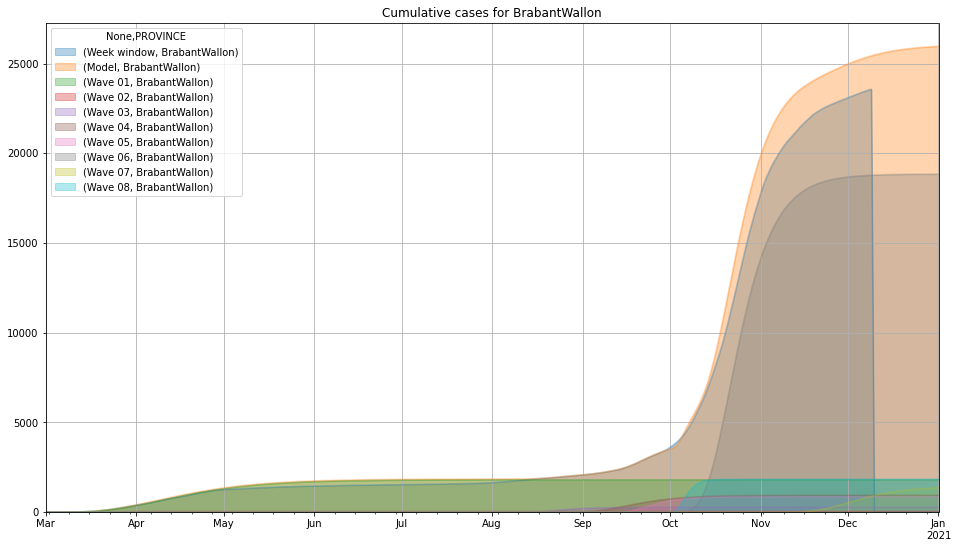

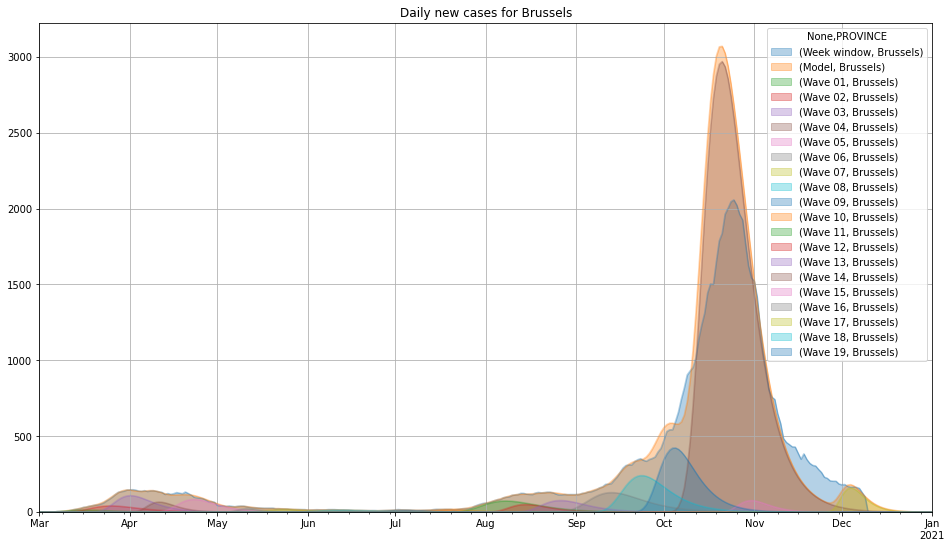

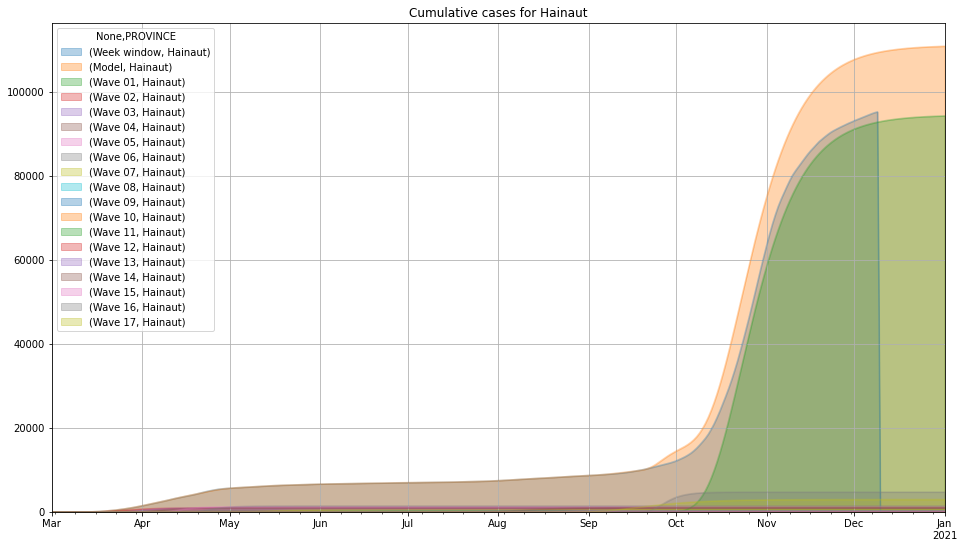

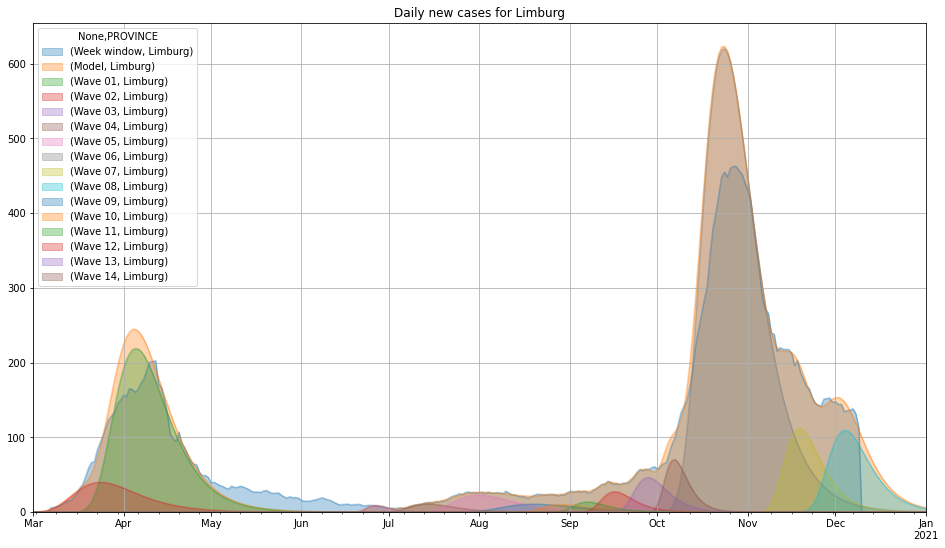

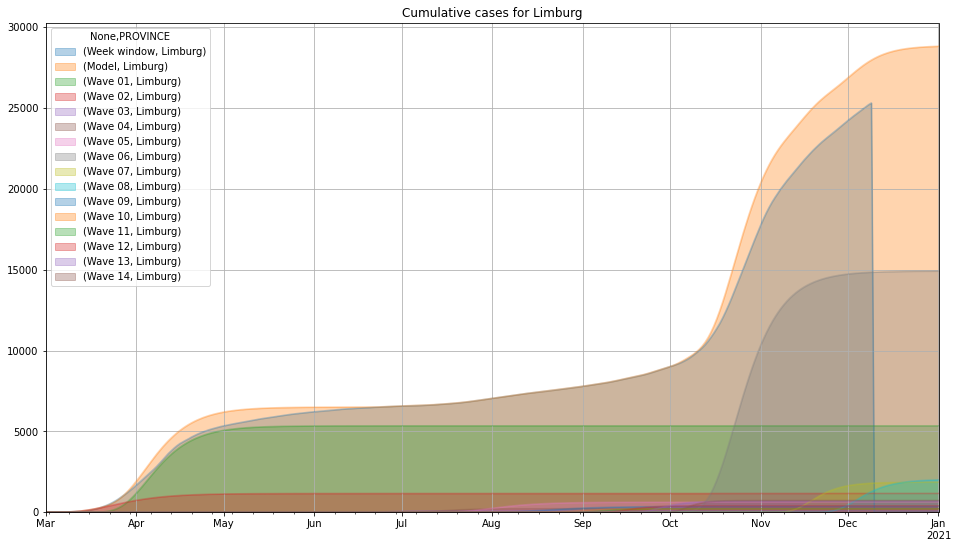

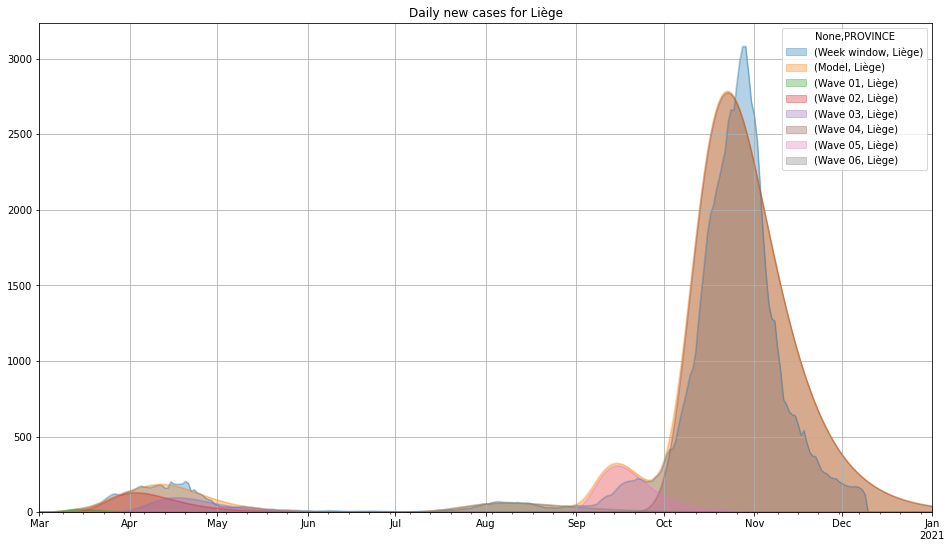

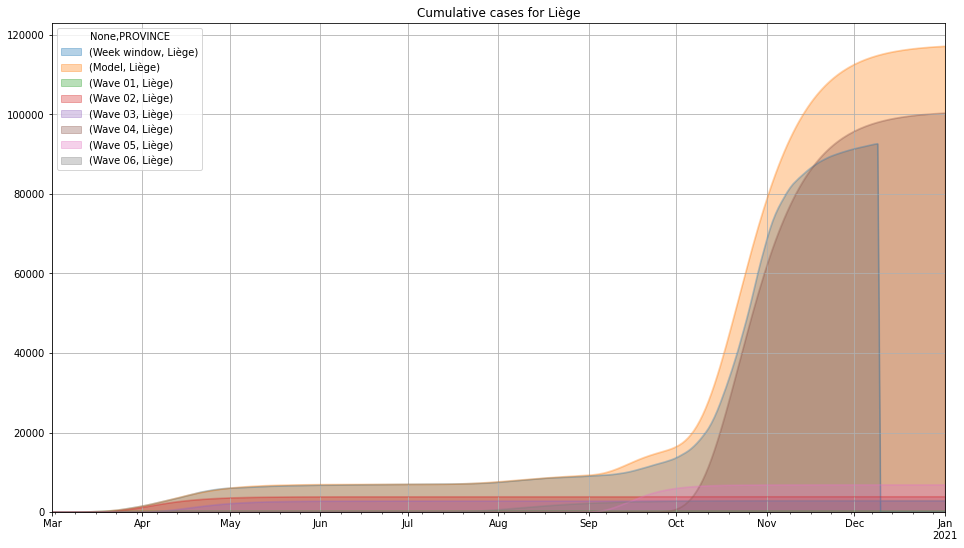

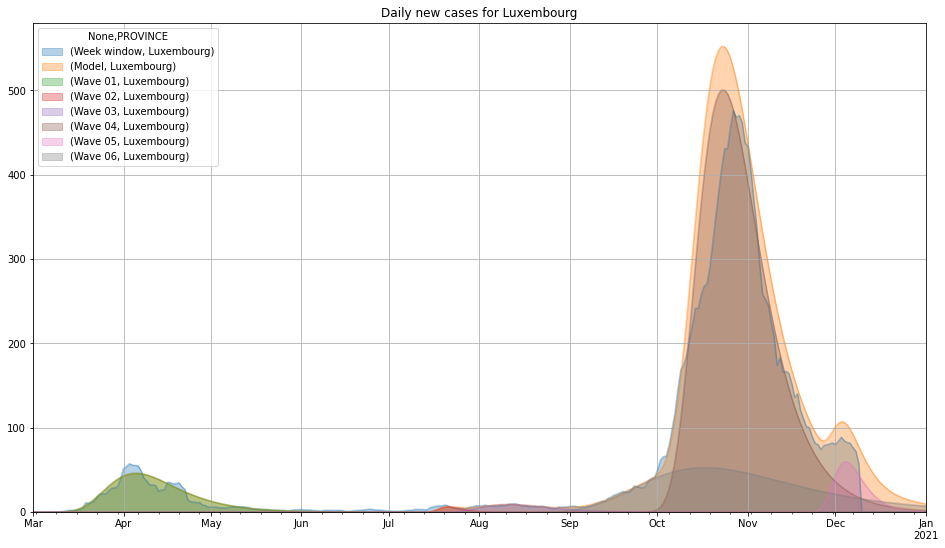

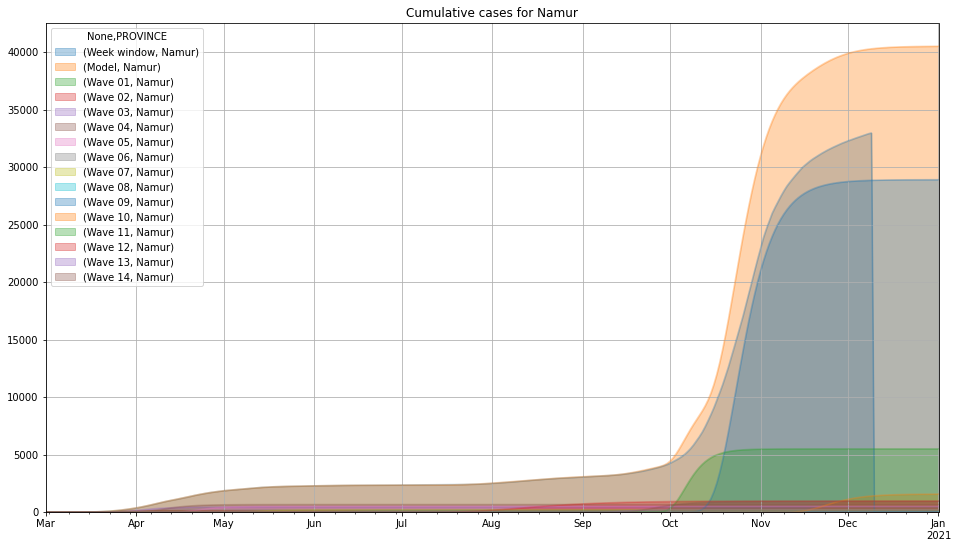

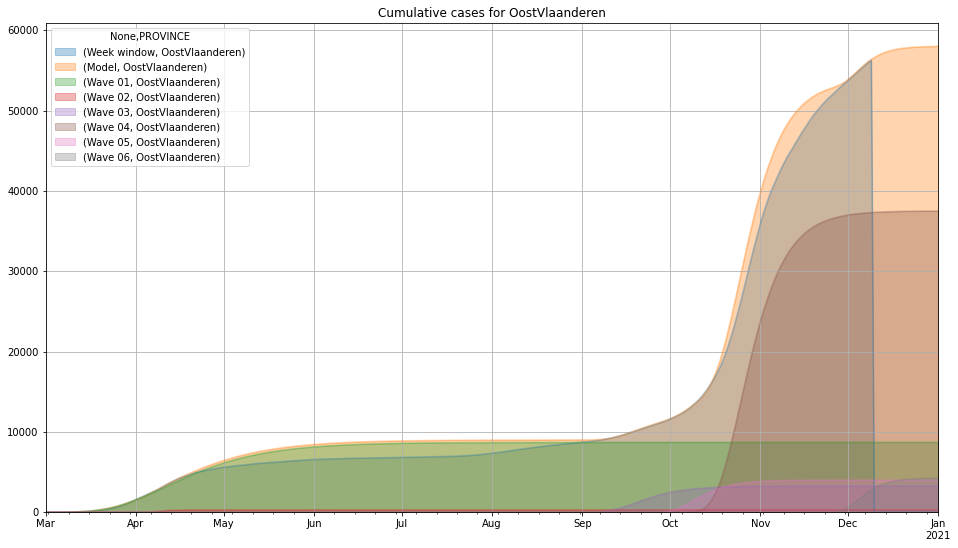

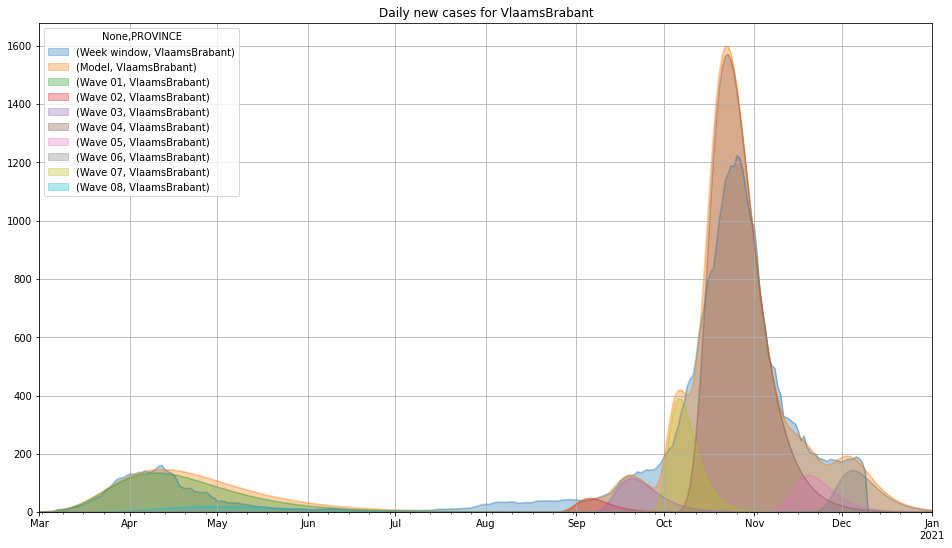

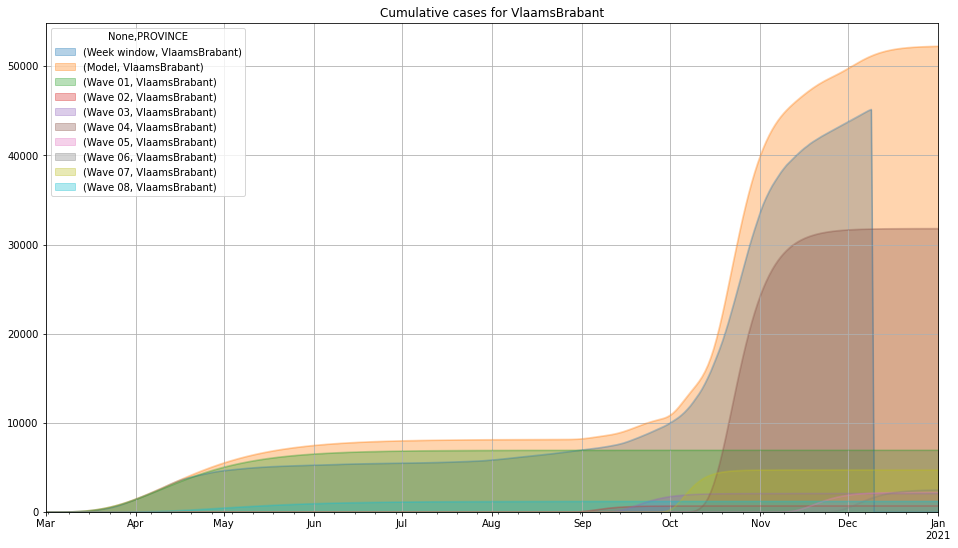

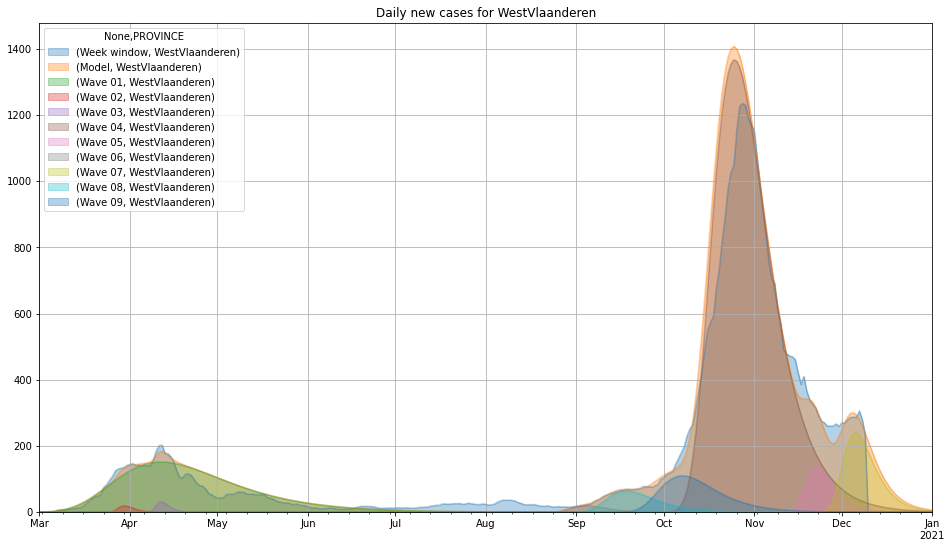

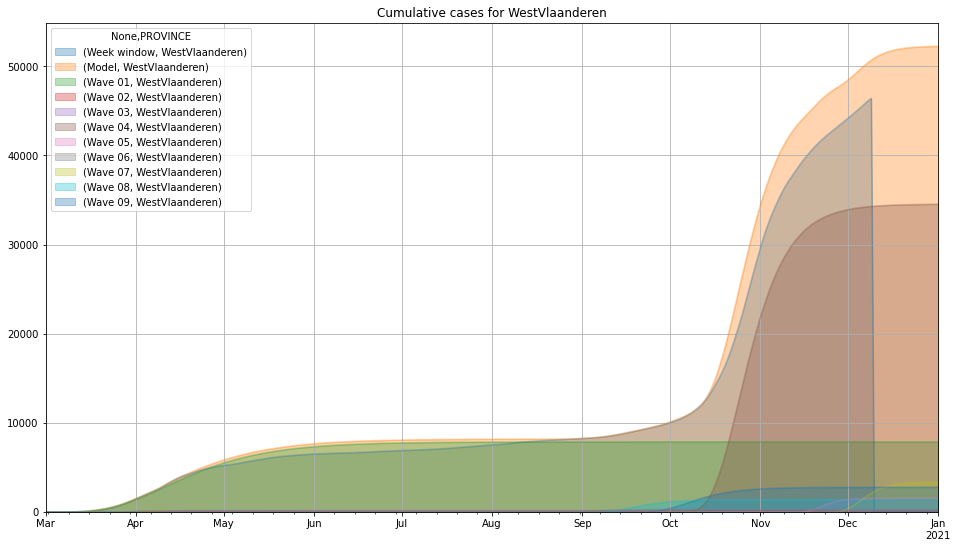

In [13]:
# Select regions to fit.
regions = np.sort(df[region].dropna().unique())

# Choose whether to output plots per region.
showplots = True

measure  = cases
smeasure = 'Week window' # smoothed
rmeasure = 'rcases'      # remaining
pmeasure = 'Model'       # predicted
wmeasure = 'Wave '       # waves

for region in regions:

    wave = 1

    df_geo[(pmeasure, region)] = 0
    df_geo[(smeasure, region)] = df_geo[measure][region].loc[:].rolling(7).mean()
    df_geo[(rmeasure, region)] = df_geo[smeasure][region]

    plotlist = [(smeasure, region), (pmeasure, region)]

    #countryname = df[df['geoId'] == country]['countriesAndTerritories'].iloc[0]
    #popdata = df[df['geoId'] == country]['popData2019'].iloc[0]

    #mincases = popdata / 1e6
    mincases = 2
    #mincases = df_geo[smeasure][country].sum() / 5000
    #mincases = max(popdata / 1e6, 10)

    print('Running multiple wave analysis for \'{}\''.format(region))
    print('Minimum number of cases is {:1.0f}'.format(mincases))

    while True:
        curwave = wmeasure + str((wave) + 1000)[-2:]
        df_geo[(curwave, region)] = 0

        df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                                measure:df_geo[rmeasure][region]})
        
        df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
        df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]

        df_pred['linear'] = np.log(df_pred['gumdiv'])

        df_pred = df_pred[(df_pred['linear'] < -0.5) &
                          (df_pred['linear'] > -4.0)]

        if len(df_pred) <= 1:
            print('--- no data left')
            break

        eax = df_pred['daynum'].values.reshape(-1, 1)
        eay = df_pred['linear'].values.reshape(-1, 1)

        #eamodel = Earth()
        #eamodel = Earth(minspan=0)
        eamodel = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
        eamodel.fit(eax, eay)

        df_pred['earth'] = eamodel.predict(eax)

        daymin = df_pred['daynum'].min()
        daymax = df_pred['daynum'].max()

        #df_pred['gbgrad'] = np.gradient(df_pred['linear'])
        #df_pred['eagrad'] = np.gradient(df_pred['earth'])
        df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
        df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

        fitmod = export.export_python_function(eamodel)

        df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                           (df_pred['daynum'] == (daymin + 1)) |
                           (df_pred['daynum'] == daymax))
        df_pred['daycount'] = df_pred.reset_index().index

        df_knot = df_pred[df_pred['knot']][['daynum', 'daycount', 'eagrad']]
        df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
        df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

        df_knot['cand'] = ((df_knot['eagrad'] < -1/40) &
                           (df_knot['daysdata'] >= 3))
        
        df_knot['since'] = df_knot['daynum'] - daymin
        df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
        df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()

        choice = df_knot[df_knot['choice']]
        if len(choice) == 0:
            print('--- no data for wave')
            break

        lower = choice['daynum'].values[0]
        upper = choice['daysdata'].values[0] + lower

        df_pred = df_pred[(df_pred['daynum'] >= lower) &
                          (df_pred['daynum'] <= upper)].copy()

        slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
        intercept = fitmod([[lower]])[0] - (lower * slope)

        beta = - 1 / slope
        mu = beta * (intercept + np.log(beta))

        df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
        df_pred['scale'] = df_pred[measure] / df_pred['pgumb']

        final = df_pred['scale'].mean()
        fincv = df_pred['scale'].std() / final

        df_geo[(curwave, region)] = final * gumpdf(df_geo['daynum'], beta, mu)        

        peak = df_geo[df_geo[(curwave, region)] == df_geo[(curwave, region)].max()].index.min()
        start = df_geo[(df_geo[(curwave, region)] >= 1) &
                       (df_geo[(curwave, region)].index < peak)].index.min()
        floor = df_geo[(df_geo[(curwave, region)] < 1) &
                       (df_geo[(curwave, region)].index > peak)].index.min()

        print('{} beta {:6.3f} mu {:3.0f} fit {:5.3f} peak {} from {} to {} size {:1.0f}'.format(
            curwave, beta, mu, (1 - fincv) ** 2, peak.date(), start.date(), floor.date(), final))
       
        df_geo[(pmeasure, region)] += df_geo[(curwave, region)]
        df_geo[(rmeasure, region)] -= df_geo[(curwave, region)]
        plotlist += [(curwave, region)]
        wave += 1
        
    if showplots:
        df_geo[plotlist].loc['20200101':'20210101'].plot(
            figsize=(16, 9),
            grid=True,
            kind='area',
            stacked=False,
            alpha=1/3,
            title='Daily new cases for '+region)

        df_geo[plotlist].loc['20200101':'20210101'].cumsum().plot(
            figsize=(16, 9),
            grid=True,
            kind='area',
            stacked=False,
            alpha=1/3,
            title='Cumulative cases for '+region)

In [14]:
df_geo.reset_index(inplace=True)

In [15]:
df_out = df_geo.melt(id_vars=['index'], value_vars=[pmeasure])
df_out.columns = (['date', 'type', 'location', 'value'])
df_out.to_csv('zzcorbel.csv')

Keep exploring! Stay home, wash your hands, keep your distance.